In [1]:
import pandas as pd

In [3]:
ri = pd.read_csv("RI_cleaned.csv", nrows = 50000)

/var/folders/b7/hcy2zgls1ql3pgkgldn0mqlm0000gn/T/ipykernel_6557/3178778489.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  ri = pd.read_csv("RI_cleaned.csv", nrows = 50000)


In [4]:
ri.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,0,NaN,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


In [5]:
ri.isnull().sum()

id                           0
state                        0
stop_date                    0
stop_time                    0
location_raw                 0
county_name              50000
county_fips              50000
fine_grained_location    50000
police_department            0
driver_gender             1990
driver_age_raw            1971
driver_age                2208
driver_race_raw           1988
driver_race               1988
violation_raw             1988
violation                 1988
search_conducted             0
search_type_raw          47988
search_type              47988
contraband_found             0
stop_outcome              1988
is_arrested               1988
stop_duration             1988
out_of_state              2203
drugs_related_stop           0
district                     0
dtype: int64

In [6]:
ri.isnull().sum()/ri.isnull().shape[0]*100

id                         0.000
state                      0.000
stop_date                  0.000
stop_time                  0.000
location_raw               0.000
county_name              100.000
county_fips              100.000
fine_grained_location    100.000
police_department          0.000
driver_gender              3.980
driver_age_raw             3.942
driver_age                 4.416
driver_race_raw            3.976
driver_race                3.976
violation_raw              3.976
violation                  3.976
search_conducted           0.000
search_type_raw           95.976
search_type               95.976
contraband_found           0.000
stop_outcome               3.976
is_arrested                3.976
stop_duration              3.976
out_of_state               4.406
drugs_related_stop         0.000
district                   0.000
dtype: float64

In [7]:
ri.shape

(50000, 26)

In [8]:
drop_columns = ["state", "county_name", "county_fips", "fine_grained_location"]
ri.drop(drop_columns, axis = "columns", inplace = True)

In [9]:
ri.shape

(50000, 22)

In [10]:
ri.isnull().sum()

id                        0
stop_date                 0
stop_time                 0
location_raw              0
police_department         0
driver_gender          1990
driver_age_raw         1971
driver_age             2208
driver_race_raw        1988
driver_race            1988
violation_raw          1988
violation              1988
search_conducted          0
search_type_raw       47988
search_type           47988
contraband_found          0
stop_outcome           1988
is_arrested            1988
stop_duration          1988
out_of_state           2203
drugs_related_stop        0
district                  0
dtype: int64

In [11]:
ri.dropna(subset = ["driver_gender"], inplace = True)

In [12]:
ri.isnull().sum()

id                        0
stop_date                 0
stop_time                 0
location_raw              0
police_department         0
driver_gender             0
driver_age_raw            0
driver_age              232
driver_race_raw           0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type_raw       45998
search_type           45998
contraband_found          0
stop_outcome              0
is_arrested               0
stop_duration             0
out_of_state            215
drugs_related_stop        0
district                  0
dtype: int64

In [13]:
ri.shape

(48010, 22)

In [14]:
ri.dtypes

id                     object
stop_date              object
stop_time              object
location_raw           object
police_department      object
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race_raw        object
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type_raw        object
search_type            object
contraband_found         bool
stop_outcome           object
is_arrested            object
stop_duration          object
out_of_state           object
drugs_related_stop       bool
district               object
dtype: object

In [15]:
ri.is_arrested.head()

0    False
1    False
3    False
4    False
5    False
Name: is_arrested, dtype: object

In [16]:
ri.is_arrested.value_counts(dropna = False)

False    45522
True      2488
Name: is_arrested, dtype: int64

In [17]:
print(ri.is_arrested.dtype)

object


In [18]:
ri["is_arrested"] = ri.is_arrested.astype("bool")

In [19]:
print(ri.is_arrested.dtype)

bool


In [20]:
ri.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
3,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
5,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [21]:
combined = ri.stop_date.str.cat(ri.stop_time, sep = " ")

In [22]:
type(ri.stop_date)

pandas.core.series.Series

In [23]:
comb = ri.stop_date + " " + ri.stop_time

In [24]:
comb.head()

0    2005-01-02 01:55
1    2005-01-02 20:30
3    2005-01-04 12:55
4    2005-01-06 01:30
5    2005-01-12 08:05
dtype: object

In [25]:
combined.head()

0    2005-01-02 01:55
1    2005-01-02 20:30
3    2005-01-04 12:55
4    2005-01-06 01:30
5    2005-01-12 08:05
Name: stop_date, dtype: object

In [26]:
ri["stop_datetime"] = pd.to_datetime(combined)

In [27]:
ri.drop(["stop_date", "stop_time"], axis = 1, inplace = True)

In [28]:
ri.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime
0,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00
1,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00
3,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00
4,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06 01:30:00
5,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12 08:05:00


In [29]:
print(ri.dtypes)

id                            object
location_raw                  object
police_department             object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race_raw               object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type_raw               object
search_type                   object
contraband_found                bool
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
out_of_state                  object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


In [30]:
ri.set_index("stop_datetime", inplace = True)

In [31]:
ri.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [67]:
ri = pd.read_csv('RI_cleaned.csv', nrows=50000)

drop_columns=["state", "county_name", "county_fips", "fine_grained_location"]
ri.drop(drop_columns, axis='columns', inplace=True)

ri.dropna(subset=['driver_gender'], inplace=True)

ri['is_arrested'] = ri.is_arrested.astype('bool')

combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.drop(["stop_date", "stop_time"], axis='columns', inplace=True)

ri.set_index('stop_datetime', inplace=True)

/var/folders/b7/hcy2zgls1ql3pgkgldn0mqlm0000gn/T/ipykernel_6557/1173830619.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  ri = pd.read_csv('RI_cleaned.csv', nrows=50000)


In [33]:
ri.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [34]:
ri.violation.value_counts(dropna = False)

Speeding               36111
Moving violation        6522
Equipment               3022
Registration/plates     1463
Other                    892
Name: violation, dtype: int64

In [35]:
ri.violation.value_counts(normalize = True)

Speeding               0.752156
Moving violation       0.135847
Equipment              0.062945
Registration/plates    0.030473
Other                  0.018579
Name: violation, dtype: float64

In [36]:
ri["driver_gender"].value_counts(dropna = False)

M    34701
F    13309
Name: driver_gender, dtype: int64

In [37]:
female = ri[ri.driver_gender == "F"]

male = ri[ri.driver_gender == "M"]

In [38]:
female.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-02-24 01:20:00,RI-2005-00016,Zone X3,200,F,1983.0,22.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone X3
2005-03-14 10:00:00,RI-2005-00019,Zone K3,300,F,1984.0,21.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K3
2005-03-29 23:20:00,RI-2005-00026,Zone K3,300,F,1971.0,34.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K3
2005-06-06 13:20:00,RI-2005-00035,Zone X4,500,F,1986.0,19.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-06-18 16:30:00,RI-2005-00037,Zone X4,500,F,1964.0,41.0,W,White,Other Traffic Violation,Moving violation,False,NaN,NaN,False,Arrest Driver,True,30+ Min,False,False,Zone X4


In [39]:
male.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [40]:
female.violation.value_counts(normalize = True)

Speeding               0.811180
Moving violation       0.099031
Equipment              0.045608
Registration/plates    0.027575
Other                  0.016605
Name: violation, dtype: float64

In [41]:
male.violation.value_counts(normalize = True)

Speeding               0.729518
Moving violation       0.149967
Equipment              0.069595
Registration/plates    0.031584
Other                  0.019337
Name: violation, dtype: float64

In [42]:
ri.groupby(["driver_gender"])["violation"].value_counts(normalize = True, dropna = False)

driver_gender  violation          
F              Speeding               0.811180
               Moving violation       0.099031
               Equipment              0.045608
               Registration/plates    0.027575
               Other                  0.016605
M              Speeding               0.729518
               Moving violation       0.149967
               Equipment              0.069595
               Registration/plates    0.031584
               Other                  0.019337
Name: violation, dtype: float64

In [43]:
female_and_speeding = ri[(ri.driver_gender == "F") & (ri.violation == "Speeding")]

male_and_speeding = ri[(ri.driver_gender == "M") & (ri.violation == "Speeding")]

In [44]:
female_and_speeding.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-02-24 01:20:00,RI-2005-00016,Zone X3,200,F,1983.0,22.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone X3
2005-03-14 10:00:00,RI-2005-00019,Zone K3,300,F,1984.0,21.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K3
2005-03-29 23:20:00,RI-2005-00026,Zone K3,300,F,1971.0,34.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K3
2005-06-06 13:20:00,RI-2005-00035,Zone X4,500,F,1986.0,19.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-07-06 11:22:00,RI-2005-00038,Zone X1,0,F,1973.0,32.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X1


In [45]:
ri.stop_outcome.value_counts(dropna = False)

Citation            43787
Arrest Driver        2268
Warning               871
N/D                   663
Arrest Passenger      220
No Action             201
Name: stop_outcome, dtype: int64

In [46]:
print(female_and_speeding.stop_outcome.value_counts(normalize = True))
print("--------------------")
print(male_and_speeding.stop_outcome.value_counts(normalize = True))

Citation            0.973416
Warning             0.012968
Arrest Driver       0.007410
N/D                 0.003612
Arrest Passenger    0.002316
No Action           0.000278
Name: stop_outcome, dtype: float64
--------------------
Citation            0.957298
Arrest Driver       0.026230
Warning             0.010666
N/D                 0.003397
Arrest Passenger    0.002015
No Action           0.000395
Name: stop_outcome, dtype: float64


In [47]:
ri.groupby(["violation", "driver_gender"])["stop_outcome"].value_counts(normalize = True)

violation            driver_gender  stop_outcome    
Equipment            F              Citation            0.650741
                                    N/D                 0.205931
                                    Arrest Driver       0.065898
                                    Warning             0.046129
                                    Arrest Passenger    0.026359
                                    No Action           0.004942
                     M              Citation            0.682402
                                    N/D                 0.133333
                                    Arrest Driver       0.117184
                                    Warning             0.050104
                                    Arrest Passenger    0.014493
                                    No Action           0.002484
Moving violation     F              Citation            0.868741
                                    Arrest Driver       0.072838
                                    W

In [48]:
print(ri.search_conducted.dtype)

bool


In [49]:
ri.search_conducted.value_counts(normalize = True)

False    0.958092
True     0.041908
Name: search_conducted, dtype: float64

In [50]:
ri.search_conducted.mean()

0.04190793584669861

In [51]:
ri[ri.driver_gender == "F"].search_conducted.mean()

0.017807498685100308

In [52]:
ri[ri.driver_gender == "M"].search_conducted.mean()

0.05115126365234431

In [53]:
ri.groupby("driver_gender")["search_conducted"].mean()

driver_gender
F    0.017807
M    0.051151
Name: search_conducted, dtype: float64

In [54]:
ri.groupby(["driver_gender", "violation"]).search_conducted.mean()

driver_gender  violation          
F              Equipment              0.079077
               Moving violation       0.047800
               Other                  0.045249
               Registration/plates    0.114441
               Speeding               0.006854
M              Equipment              0.123395
               Moving violation       0.088778
               Other                  0.154993
               Registration/plates    0.171533
               Speeding               0.028560
Name: search_conducted, dtype: float64

In [55]:
ri.groupby(["violation", "driver_gender"]).search_conducted.mean()

violation            driver_gender
Equipment            F                0.079077
                     M                0.123395
Moving violation     F                0.047800
                     M                0.088778
Other                F                0.045249
                     M                0.154993
Registration/plates  F                0.114441
                     M                0.171533
Speeding             F                0.006854
                     M                0.028560
Name: search_conducted, dtype: float64

In [56]:
ri.search_type.value_counts()

Incident to Arrest                                          958
Probable Cause                                              244
Protective Frisk                                            204
Inventory                                                   117
Incident to Arrest,Inventory                                116
Incident to Arrest,Probable Cause                            76
Incident to Arrest,Protective Frisk                          63
Reasonable Suspicion                                         43
Probable Cause,Protective Frisk                              36
Incident to Arrest,Inventory,Protective Frisk                33
Inventory,Protective Frisk                                   23
Incident to Arrest,Probable Cause,Protective Frisk           20
Incident to Arrest,Inventory,Probable Cause                  19
Inventory,Probable Cause                                     16
Protective Frisk,Reasonable Suspicion                        16
Probable Cause,Reasonable Suspicion     

In [57]:
ri["frisk"] = ri.search_type.str.contains("Protective Frisk", na = False)

In [58]:
print(ri.frisk.dtype)

bool


In [59]:
ri.frisk.sum()

403

In [60]:
ri[ri.frisk]

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-02-09 03:05:00,RI-2005-00011,Zone X4,500,M,1976.0,29.0,W,White,Registration Violation,Registration/plates,...,"Probable Cause,Terry Frisk","Probable Cause,Protective Frisk",False,Citation,False,0-15 Min,False,False,Zone X4,True
2005-08-28 01:00:00,RI-2005-00084,Zone X1,0,M,1979.0,26.0,W,White,Other Traffic Violation,Moving violation,...,"Incident to Arrest,Terry Frisk","Incident to Arrest,Protective Frisk",False,Arrest Driver,True,16-30 Min,True,False,Zone X1,True
2005-10-01 16:20:00,RI-2005-00253,Zone K1,600,M,1958.0,47.0,W,White,Speeding,Speeding,...,"Reasonable Suspicion,Terry Frisk","Protective Frisk,Reasonable Suspicion",True,Citation,False,16-30 Min,False,False,Zone K1,True
2005-10-06 21:35:00,RI-2005-01027,Zone X4,500,M,1966.0,39.0,W,White,Speeding,Speeding,...,Terry Frisk,Protective Frisk,False,Citation,False,0-15 Min,False,False,Zone X4,True
2005-10-07 11:33:00,RI-2005-01121,Zone X4,900,M,1980.0,25.0,W,White,Equipment/Inspection Violation,Equipment,...,Terry Frisk,Protective Frisk,False,Arrest Driver,True,16-30 Min,False,False,Zone X4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-08-05 07:24:00,RI-2006-35304,Zone K1,600,M,1976.0,30.0,W,White,Speeding,Speeding,...,Terry Frisk,Protective Frisk,False,Citation,False,0-15 Min,True,False,Zone K1,True
2006-08-06 02:45:00,RI-2006-35412,Zone K2,900,M,1983.0,23.0,W,White,Speeding,Speeding,...,Terry Frisk,Protective Frisk,False,Citation,False,0-15 Min,True,False,Zone K2,True
2006-08-08 00:15:00,RI-2006-35744,Zone K3,300,M,1971.0,35.0,W,White,Other Traffic Violation,Moving violation,...,"Probable Cause,Terry Frisk","Probable Cause,Protective Frisk",True,Citation,False,16-30 Min,False,True,Zone K3,True


In [61]:
searched = ri[ri.search_conducted]

In [62]:
searched

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-24 20:32:00,RI-2005-00010,Zone K1,600,M,1987.0,18.0,W,White,Speeding,Speeding,...,Probable Cause,Probable Cause,True,Citation,False,0-15 Min,True,True,Zone K1,False
2005-02-09 03:05:00,RI-2005-00011,Zone X4,500,M,1976.0,29.0,W,White,Registration Violation,Registration/plates,...,"Probable Cause,Terry Frisk","Probable Cause,Protective Frisk",False,Citation,False,0-15 Min,False,False,Zone X4,True
2005-08-28 01:00:00,RI-2005-00084,Zone X1,0,M,1979.0,26.0,W,White,Other Traffic Violation,Moving violation,...,"Incident to Arrest,Terry Frisk","Incident to Arrest,Protective Frisk",False,Arrest Driver,True,16-30 Min,True,False,Zone X1,True
2005-09-15 02:20:00,RI-2005-00094,Zone X4,500,M,1988.0,17.0,W,White,Other Traffic Violation,Moving violation,...,Incident to Arrest,Incident to Arrest,False,Arrest Driver,True,16-30 Min,False,False,Zone X4,False
2005-09-24 02:20:00,RI-2005-00115,Zone K3,300,M,1987.0,18.0,W,White,Other Traffic Violation,Moving violation,...,Incident to Arrest,Incident to Arrest,False,Arrest Driver,True,16-30 Min,False,False,Zone K3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-08-07 23:40:00,RI-2006-35738,Zone X3,200,F,1984.0,22.0,W,White,Call for Service,Other,...,Incident to Arrest,Incident to Arrest,False,Arrest Driver,True,16-30 Min,False,False,Zone X3,False
2006-08-08 00:15:00,RI-2006-35744,Zone K3,300,M,1971.0,35.0,W,White,Other Traffic Violation,Moving violation,...,"Probable Cause,Terry Frisk","Probable Cause,Protective Frisk",True,Citation,False,16-30 Min,False,True,Zone K3,True
2006-08-08 00:15:00,RI-2006-35745,Zone X4,500,M,1971.0,35.0,W,White,Speeding,Speeding,...,"Probable Cause,Terry Frisk","Probable Cause,Protective Frisk",True,Citation,False,16-30 Min,False,True,Zone X4,True


In [63]:
searched.frisk.mean()

0.20029821073558648

In [64]:
searched.groupby("driver_gender").frisk.mean()

driver_gender
F    0.164557
M    0.205070
Name: frisk, dtype: float64

In [88]:
ri = pd.read_csv('RI_cleaned.csv')

drop_columns=["state", "county_name", "county_fips", "fine_grained_location"]
ri.drop(drop_columns, axis='columns', inplace=True)

ri.dropna(subset=['driver_gender'], inplace=True)

ri['is_arrested'] = ri.is_arrested.astype('bool')

combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.drop(["stop_date", "stop_time"], axis='columns', inplace=True)

ri["date_time"]=ri.stop_datetime

ri.set_index('stop_datetime', inplace=True)

/var/folders/b7/hcy2zgls1ql3pgkgldn0mqlm0000gn/T/ipykernel_6557/624873480.py:1: DtypeWarning: Columns (8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  ri = pd.read_csv('RI_cleaned.csv')


In [89]:
ri.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,date_time
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00
2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06 01:30:00
2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12 08:05:00


In [90]:
ri.is_arrested.mean()

0.03454755048024903

In [91]:
ri.index.hour

Int64Index([ 1, 20, 12,  1,  8,  8, 17, 23, 20,  3,
            ...
            22, 22, 22, 22, 22, 22, 22, 23, 23, 23],
           dtype='int64', name='stop_datetime', length=480584)

In [92]:
ri.index

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-02 20:30:00',
               '2005-01-04 12:55:00', '2005-01-06 01:30:00',
               '2005-01-12 08:05:00', '2005-01-18 08:15:00',
               '2005-01-18 17:13:00', '2005-01-23 23:15:00',
               '2005-01-24 20:32:00', '2005-02-09 03:05:00',
               ...
               '2015-12-31 22:10:00', '2015-12-31 22:14:00',
               '2015-12-31 22:26:00', '2015-12-31 22:38:00',
               '2015-12-31 22:39:00', '2015-12-31 22:46:00',
               '2015-12-31 22:47:00', '2015-12-31 23:08:00',
               '2015-12-31 23:44:00', '2015-12-31 23:48:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=480584, freq=None)

In [93]:
ri.groupby(ri.index.hour).is_arrested.mean()

stop_datetime
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64

In [94]:
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

In [96]:
ri.date_time.head()

stop_datetime
2005-01-02 01:55:00   2005-01-02 01:55:00
2005-01-02 20:30:00   2005-01-02 20:30:00
2005-01-04 12:55:00   2005-01-04 12:55:00
2005-01-06 01:30:00   2005-01-06 01:30:00
2005-01-12 08:05:00   2005-01-12 08:05:00
Name: date_time, dtype: datetime64[ns]

In [97]:
ri.date_time.dt.hour.values

array([ 1, 20, 12, ..., 23, 23, 23])

In [98]:
ri.date_time.dt.weekday

stop_datetime
2005-01-02 01:55:00    6
2005-01-02 20:30:00    6
2005-01-04 12:55:00    1
2005-01-06 01:30:00    3
2005-01-12 08:05:00    2
                      ..
2015-12-31 22:46:00    3
2015-12-31 22:47:00    3
2015-12-31 23:08:00    3
2015-12-31 23:44:00    3
2015-12-31 23:48:00    3
Name: date_time, Length: 480584, dtype: int64

In [99]:
ri.groupby(ri.date_time.dt.hour).is_arrested.mean()

date_time
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64

In [100]:
import matplotlib.pyplot as plt

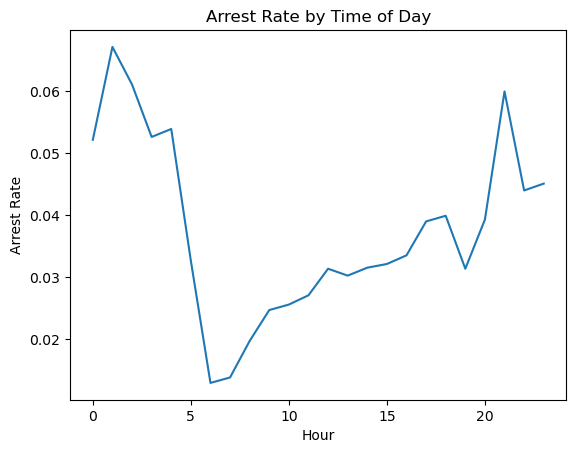

In [101]:
hourly_arrest_rate.plot()

plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")

plt.show()

In [102]:
ri.head(2)

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,date_time
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00


In [103]:
ri.drugs_related_stop.value_counts(dropna = False)

False    475819
True       4765
Name: drugs_related_stop, dtype: int64

In [104]:
ri.drugs_related_stop.dtypes

dtype('bool')

In [105]:
ri.groupby(ri.index.year).drugs_related_stop.mean()

stop_datetime
2005    0.008038
2006    0.006624
2007    0.008437
2008    0.007549
2009    0.010447
2010    0.010142
2011    0.011400
2012    0.010343
2013    0.011879
2014    0.013176
2015    0.010598
Name: drugs_related_stop, dtype: float64

In [106]:
ri.drugs_related_stop.resample("A").mean()

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [107]:
ri.drugs_related_stop.resample("Q").mean()

stop_datetime
2005-03-31    0.038462
2005-06-30    0.000000
2005-09-30    0.000000
2005-12-31    0.008054
2006-03-31    0.006718
2006-06-30    0.004827
2006-09-30    0.007578
2006-12-31    0.007396
2007-03-31    0.005633
2007-06-30    0.008159
2007-09-30    0.011103
2007-12-31    0.009431
2008-03-31    0.008689
2008-06-30    0.007828
2008-09-30    0.006388
2008-12-31    0.007391
2009-03-31    0.009120
2009-06-30    0.010512
2009-09-30    0.009478
2009-12-31    0.013257
2010-03-31    0.011422
2010-06-30    0.009872
2010-09-30    0.010294
2010-12-31    0.008719
2011-03-31    0.013235
2011-06-30    0.013576
2011-09-30    0.009950
2011-12-31    0.009483
2012-03-31    0.010989
2012-06-30    0.011053
2012-09-30    0.008115
2012-12-31    0.011127
2013-03-31    0.013310
2013-06-30    0.011984
2013-09-30    0.011308
2013-12-31    0.010915
2014-03-31    0.013768
2014-06-30    0.013892
2014-09-30    0.013819
2014-12-31    0.010830
2015-03-31    0.013201
2015-06-30    0.011628
2015-09-30    0.0104

In [108]:
ri.drugs_related_stop.resample("M").mean()

stop_datetime
2005-01-31    0.111111
2005-02-28    0.000000
2005-03-31    0.000000
2005-04-30    0.000000
2005-05-31    0.000000
                ...   
2015-08-31    0.009389
2015-09-30    0.008172
2015-10-31    0.006429
2015-11-30    0.007361
2015-12-31    0.008844
Freq: M, Name: drugs_related_stop, Length: 132, dtype: float64

In [109]:
annual_drug_rate = ri.drugs_related_stop.resample("A").mean()

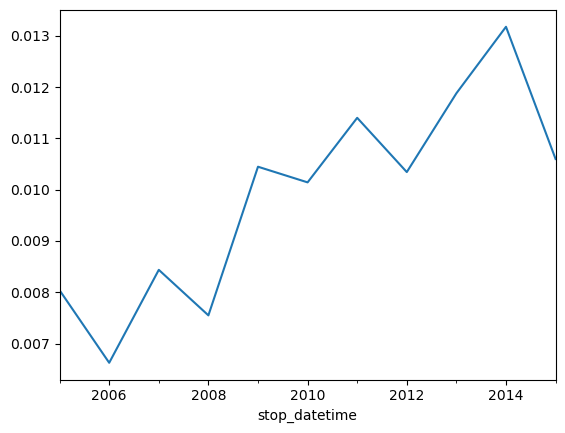

In [110]:
annual_drug_rate.plot()

plt.show()

In [111]:
ri.columns

Index(['id', 'location_raw', 'police_department', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_raw',
       'search_type', 'contraband_found', 'stop_outcome', 'is_arrested',
       'stop_duration', 'out_of_state', 'drugs_related_stop', 'district',
       'date_time'],
      dtype='object')

In [112]:
ri.search_conducted.head()

stop_datetime
2005-01-02 01:55:00    False
2005-01-02 20:30:00    False
2005-01-04 12:55:00    False
2005-01-06 01:30:00    False
2005-01-12 08:05:00    False
Name: search_conducted, dtype: object

In [113]:
ri.search_conducted.value_counts(dropna = False)

False    462822
True      17762
Name: search_conducted, dtype: int64

In [114]:
ri.search_conducted.dtypes

dtype('O')

In [115]:
ri["search_conducted"] = ri.search_conducted.astype("bool")

In [116]:
ri.groupby(ri.index.year).search_conducted.mean()

stop_datetime
2005    0.050692
2006    0.037748
2007    0.041844
2008    0.039544
2009    0.049849
2010    0.042089
2011    0.037767
2012    0.032278
2013    0.029054
2014    0.030157
2015    0.027832
Name: search_conducted, dtype: float64

In [117]:
annual_search_rate = ri.search_conducted.resample("A").mean()

In [118]:
annual_search_rate

stop_datetime
2005-12-31    0.050692
2006-12-31    0.037748
2007-12-31    0.041844
2008-12-31    0.039544
2009-12-31    0.049849
2010-12-31    0.042089
2011-12-31    0.037767
2012-12-31    0.032278
2013-12-31    0.029054
2014-12-31    0.030157
2015-12-31    0.027832
Freq: A-DEC, Name: search_conducted, dtype: float64

In [119]:
annual = pd.concat([annual_drug_rate, annual_search_rate], axis = "columns")

In [120]:
annual

,drugs_related_stop,search_conducted
stop_datetime,,
2005-12-31,0.008038,0.050692
2006-12-31,0.006624,0.037748
2007-12-31,0.008437,0.041844
2008-12-31,0.007549,0.039544
2009-12-31,0.010447,0.049849
2010-12-31,0.010142,0.042089
2011-12-31,0.011400,0.037767
2012-12-31,0.010343,0.032278
2013-12-31,0.011879,0.029054


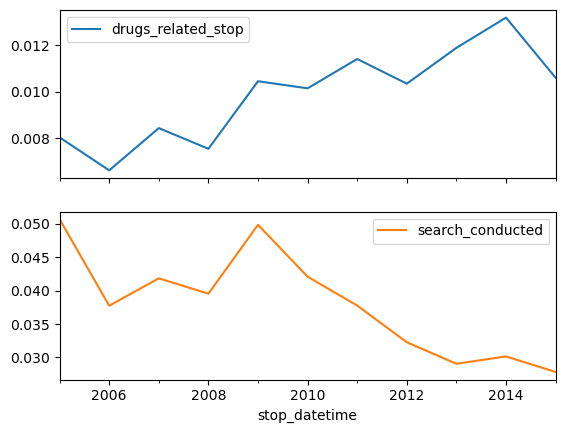

In [121]:
annual.plot(subplots = True)

plt.show()

In [122]:
ri.head(2)

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,date_time
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00


In [123]:
ri.district.unique()

array(['Zone K1', 'Zone X4', 'Zone X1', 'Zone K3', 'Zone X3', 'Zone K2'],
      dtype=object)

In [124]:
ri.district.value_counts(dropna = False)

Zone X4    125670
Zone K3    108868
Zone K2     97281
Zone X3     89431
Zone K1     46110
Zone X1     13224
Name: district, dtype: int64

In [125]:
ri.violation.unique()

array(['Speeding', 'Equipment', 'Other', 'Moving violation',
       'Registration/plates', 'Seat belt'], dtype=object)

In [126]:
ri.violation.value_counts(dropna = False)

Speeding               268736
Moving violation        90228
Equipment               61250
Other                   24216
Registration/plates     19830
Seat belt               16324
Name: violation, dtype: int64

In [127]:
pd.crosstab(ri.district, ri.violation)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17178,4069,3532,4445,48687
Zone X4,19975,29554,8865,7551,4870,54855


In [128]:
all_zones = pd.crosstab(ri.district, ri.violation)

In [129]:
all_zones.loc["Zone K1" : "Zone K3"]

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234


In [130]:
k_zones = all_zones.loc["Zone K1" : "Zone K3"]

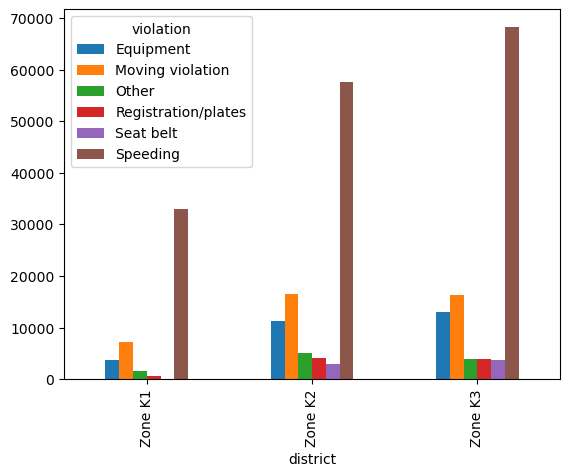

In [131]:
k_zones.plot(kind = "bar")
plt.show()

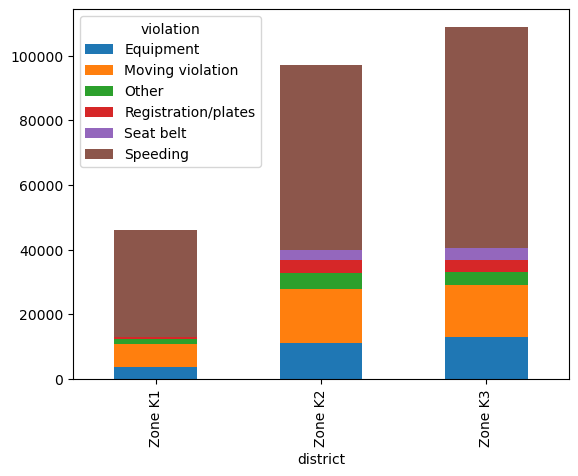

In [133]:
k_zones.plot(kind = "bar", stacked = True)
plt.show()

In [134]:
ri.head(2)

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,date_time
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00


In [135]:
ri.stop_duration.head()

stop_datetime
2005-01-02 01:55:00     0-15 Min
2005-01-02 20:30:00    16-30 Min
2005-01-04 12:55:00     0-15 Min
2005-01-06 01:30:00     0-15 Min
2005-01-12 08:05:00      30+ Min
Name: stop_duration, dtype: object

In [136]:
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min', '2', '1'], dtype=object)

In [137]:
ri.stop_duration.value_counts(dropna = False)

0-15 Min     386646
16-30 Min     76320
30+ Min       17612
1                 5
2                 1
Name: stop_duration, dtype: int64

In [139]:
mapping = {"0-15 Min" : 8, "16-30 Min" : 23, "30+ Min" : 45}

In [140]:
ri["stop_minutes"] = ri.stop_duration.map(mapping)

In [141]:
ri.stop_minutes.value_counts(dropna = False)

8.0     386646
23.0     76320
45.0     17612
NaN          6
Name: stop_minutes, dtype: int64

In [142]:
ri.violation_raw.unique()

array(['Speeding', 'Equipment/Inspection Violation', 'Call for Service',
       'Other Traffic Violation', 'Registration Violation',
       'Violation of City/Town Ordinance',
       'Special Detail/Directed Patrol', 'APB',
       'Motorist Assist/Courtesy', 'Suspicious Person', 'Warrant',
       'Seatbelt Violation'], dtype=object)

In [143]:
ri.groupby("violation_raw").stop_minutes.mean()

violation_raw
APB                                 18.593814
Call for Service                    21.963314
Equipment/Inspection Violation      11.454326
Motorist Assist/Courtesy            17.629929
Other Traffic Violation             13.834359
Registration Violation              13.543268
Seatbelt Violation                   9.698236
Special Detail/Directed Patrol      14.876778
Speeding                            10.589215
Suspicious Person                   18.374269
Violation of City/Town Ordinance    13.230695
Warrant                             19.769231
Name: stop_minutes, dtype: float64

In [144]:
stop_length = ri.groupby("violation_raw").stop_minutes.mean()

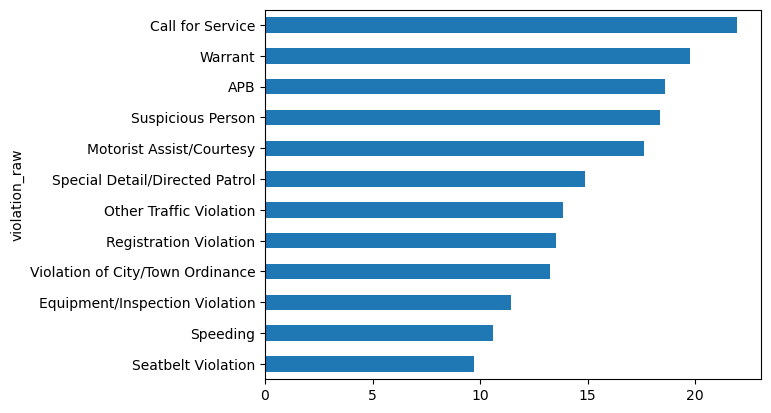

In [145]:
stop_length.sort_values().plot(kind = "barh")

plt.show()

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [147]:
weather = pd.read_csv("weather.csv")

In [148]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
weather.shape

(8022, 26)

In [150]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8022 entries, 0 to 8021
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  8022 non-null   object 
 1   DATE     8022 non-null   object 
 2   AWND     4017 non-null   float64
 3   TAVG     1217 non-null   float64
 4   TMAX     8005 non-null   float64
 5   TMIN     7996 non-null   float64
 6   WT01     1777 non-null   float64
 7   WT02     221 non-null    float64
 8   WT03     227 non-null    float64
 9   WT04     119 non-null    float64
 10  WT05     360 non-null    float64
 11  WT06     25 non-null     float64
 12  WT07     79 non-null     float64
 13  WT08     404 non-null    float64
 14  WT09     69 non-null     float64
 15  WT10     2 non-null      float64
 16  WT11     3 non-null      float64
 17  WT13     1175 non-null   float64
 18  WT14     575 non-null    float64
 19  WT15     6 non-null      float64
 20  WT16     1326 non-null   float64
 21  WT17     12 no

In [151]:
weather[["TMIN", "TAVG", "TMAX"]].describe()

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


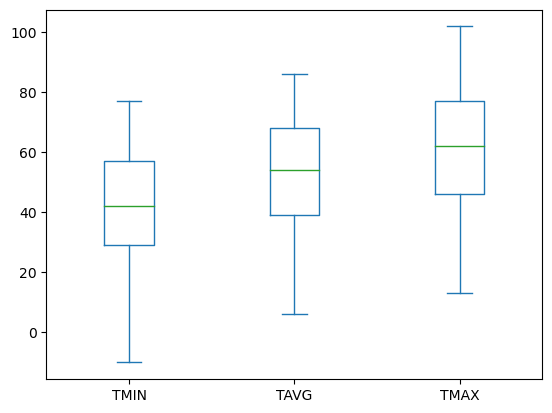

In [152]:
weather[["TMIN", "TAVG", "TMAX"]].plot(kind = "box")

plt.show()

In [153]:
weather["TDIFF"] = weather["TMAX"] - weather["TMIN"]

In [154]:
weather["TDIFF"].describe()

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

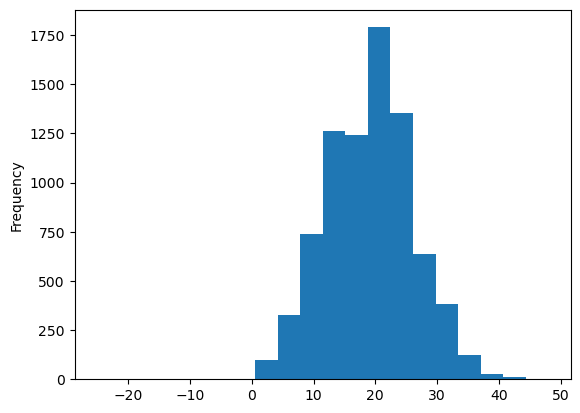

In [155]:
weather.TDIFF.plot(kind = "hist", bins = 20)

plt.show()

In [156]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0


In [157]:
WT = weather.loc[:, "WT01" : "WT22"]

In [158]:
WT.head()

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
weather["bad_conditions"] = WT.sum(axis = "columns")

In [160]:
weather.bad_conditions.value_counts(dropna = False)

0.0    5738
1.0     628
4.0     476
3.0     380
2.0     368
5.0     282
6.0     101
7.0      41
9.0       4
8.0       4
Name: bad_conditions, dtype: int64

In [161]:
weather["bad_conditions"] = weather.bad_conditions.fillna(0).astype("int")

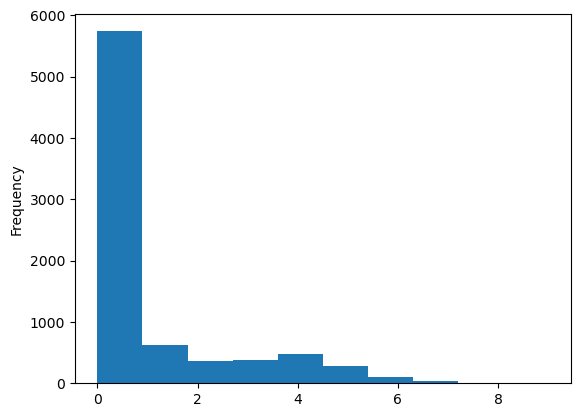

In [162]:
weather.bad_conditions.plot(kind = "hist")

plt.show()

In [163]:
weather.bad_conditions.value_counts(dropna = False)

0    5738
1     628
4     476
3     380
2     368
5     282
6     101
7      41
9       4
8       4
Name: bad_conditions, dtype: int64

In [164]:
weather.bad_conditions.value_counts(dropna = False).sort_index()

0    5738
1     628
2     368
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

In [165]:
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

In [166]:
weather["rating"] = weather.bad_conditions.map(mapping)

In [167]:
weather.rating.value_counts(dropna = False)

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

In [168]:
weather.rating[0]

'good'

In [169]:
type(weather.rating[0])

str

In [170]:
cats = ["good", "bad", "worse"]

In [171]:
weather["rating"] = pd.Categorical(weather["rating"], ordered = True, categories = cats)

In [172]:
weather.rating.head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

In [173]:
weather.rating.tail()

8017     bad
8018    good
8019     bad
8020     bad
8021     bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

In [174]:
weather.rating.min()

'good'

In [175]:
weather.rating.max()

'worse'

In [176]:
weather.rating.sort_values()

0        good
3832     good
3831     good
3830     good
3829     good
        ...  
4853    worse
4852    worse
4851    worse
4871    worse
4010    worse
Name: rating, Length: 8022, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

In [177]:
import pandas as pd

ri = pd.read_csv('RI_cleaned.csv', nrows=50000)

drop_columns=["state", "county_name", "county_fips", "fine_grained_location"]
ri.drop(drop_columns, axis='columns', inplace=True)

ri.dropna(subset=['driver_gender'], inplace=True)

ri['is_arrested'] = ri.is_arrested.astype('bool')

combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)

/var/folders/b7/hcy2zgls1ql3pgkgldn0mqlm0000gn/T/ipykernel_6557/1552640547.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  ri = pd.read_csv('RI_cleaned.csv', nrows=50000)


In [178]:
ri.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime
0,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00
1,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00
3,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00
4,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06 01:30:00
5,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12 08:05:00


In [179]:
weather_rating = weather[["DATE", "rating"]]

In [180]:
weather_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


In [181]:
weather_rating.shape

(8022, 2)

In [182]:
weather_rating.DATE.nunique()

4017

In [183]:
ri.stop_date[3]

'2005-01-04'

In [184]:
weather_rating.DATE[3]

'2005-01-04'

In [185]:
ri.shape

(48010, 23)

In [186]:
ri_weather = pd.merge(left = ri, right = weather_rating, left_on = "stop_date", right_on = "DATE", how = "left")

In [187]:
ri_weather.shape

(95877, 25)